# **WebScrapping Wikipedia Using BeautifulSoup**

In [1]:
import nltk
import urllib
import bs4 as bs
import re
import io
import pandas as pd
import gensim
import regex
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAHESHWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAHESHWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Gettings the data source
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Statistics').read()

In [3]:
# Parsing the data/ creating BeautifulSoup object
soup = bs.BeautifulSoup(source,'lxml')

In [4]:
# Fetching the data
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [5]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [6]:
# Preparing the dataset
sentence=str(text)

with io.open("Statistics.txt", "w", encoding="utf-8") as f:
    f.write(text)
    f.flush()
    f.close()

# **Topic Modeling using pyCaret**

In [7]:
#!pip install pycaret

In [8]:
# Import packages
import pycaret
from pycaret.nlp import *
from pycaret.nlp import load_model

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import spacy
spacy.load('en_core_web_sm')

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

## **Load The Dataset**

In [9]:
df=pd.read_table("Statistics (1).txt",error_bad_lines=False)
df.head()

,text
0,statistics is the discipline that concerns the...
1,"today, statistics is widely employed in govern..."
2,sampling theory is part of the mathematical d...
3,a statistic is a random variable that is a fun...
4,a critical region is the set of values of the ...


## **Setting up Environment in PyCaret(*using setup function*)**

In [10]:
text=setup(df,target='text')

Description,Value
session_id,7037
Documents,19
Vocab Size,3355
Custom Stopwords,False


In [11]:
#convert 'x' column of dataset into list format
text_list = list(df['text'])
type(text_list)

list

In [12]:
nlp_list = setup(data = text_list, session_id = 225)

Description,Value
session_id,225
Documents,19
Vocab Size,3355
Custom Stopwords,False


## **Wordcloud**

In [13]:
train_data=str(text_list)

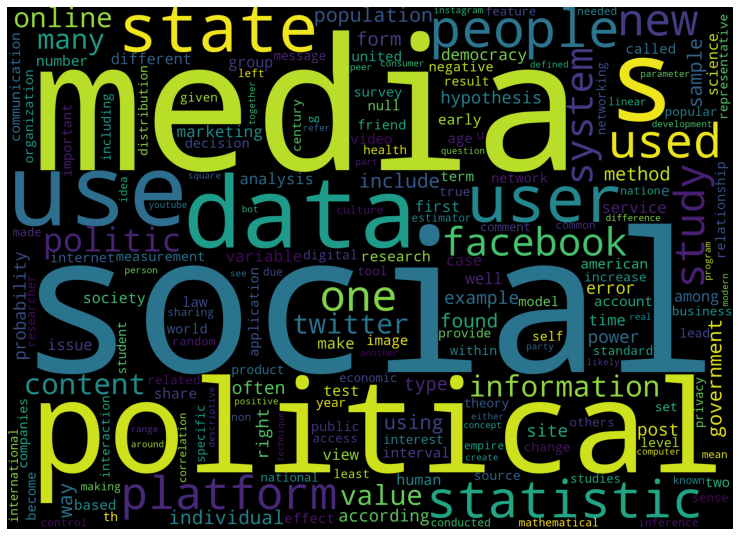

In [14]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('statistical')
stopwords.add('may')
plt.figure(figsize=(13,13))
#text = description_category.description.values
cloud = WordCloud(stopwords=STOPWORDS, background_color='black', collocations=False, width=2500, height=1800).generate(train_data)
plt.axis('off')
plt.imshow(cloud)

## **Create a Topic Model(LDA)**

In [15]:
lda = create_model('lda')
print(lda)

LdaModel(num_terms=3355, num_topics=4, decay=0.5, chunksize=100)


In [16]:
lda2 = create_model('lda', num_topics =5, multi_core = True)
print(lda2)

LdaModel(num_terms=3355, num_topics=5, decay=0.5, chunksize=100)


## **Assign a Model**

In [17]:
lda_results = assign_model(lda2)
lda_results

,en,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,statistic discipline concern collection organi...,0.000340,0.000339,0.998642,0.000339,0.000341,Topic 2,1.00
1,today statistic widely employ government busin...,0.000512,0.000514,0.997948,0.000514,0.000513,Topic 2,1.00
2,sample theory part mathematical discipline pro...,0.000319,0.000319,0.000323,0.000319,0.998719,Topic 4,1.00
3,statistic random variable function random samp...,0.671918,0.000353,0.327016,0.000354,0.000359,Topic 0,0.67
4,critical region set value estimator lead refut...,0.000492,0.000489,0.000498,0.000492,0.998029,Topic 4,1.00
5,apply statistic comprise descriptive_statistic...,0.000744,0.000743,0.997018,0.000749,0.000745,Topic 2,1.00
6,statistic also heavily use management accounti...,0.001067,0.001065,0.995721,0.001079,0.001069,Topic 2,1.00
7,social medium interactive technology allow cre...,0.000241,0.000242,0.000242,0.999034,0.000241,Topic 3,1.00
8,mobile social medium useful application mobile...,0.000094,0.000093,0.000093,0.999627,0.000093,Topic 3,1.00
9,scientist use social medium share scientific k...,0.000090,0.000090,0.000091,0.999638,0.000090,Topic 3,1.00


## **Topics**

In [18]:
df1=lda_results.rename({'en':'Text','Topic_0': 'Researches','Topic_1':'Statistic','Topic_2':'Social_medium','Topic_3':'Politic','Topic_4':'Democracy'}, axis=1)
df1

,Text,Researches,Statistic,Social_medium,Politic,Democracy,Dominant_Topic,Perc_Dominant_Topic
0,statistic discipline concern collection organi...,0.000340,0.000339,0.998642,0.000339,0.000341,Topic 2,1.00
1,today statistic widely employ government busin...,0.000512,0.000514,0.997948,0.000514,0.000513,Topic 2,1.00
2,sample theory part mathematical discipline pro...,0.000319,0.000319,0.000323,0.000319,0.998719,Topic 4,1.00
3,statistic random variable function random samp...,0.671918,0.000353,0.327016,0.000354,0.000359,Topic 0,0.67
4,critical region set value estimator lead refut...,0.000492,0.000489,0.000498,0.000492,0.998029,Topic 4,1.00
5,apply statistic comprise descriptive_statistic...,0.000744,0.000743,0.997018,0.000749,0.000745,Topic 2,1.00
6,statistic also heavily use management accounti...,0.001067,0.001065,0.995721,0.001079,0.001069,Topic 2,1.00
7,social medium interactive technology allow cre...,0.000241,0.000242,0.000242,0.999034,0.000241,Topic 3,1.00
8,mobile social medium useful application mobile...,0.000094,0.000093,0.000093,0.999627,0.000093,Topic 3,1.00
9,scientist use social medium share scientific k...,0.000090,0.000090,0.000091,0.999638,0.000090,Topic 3,1.00


In [19]:
data=df1.replace(('Topic 0','Topic 1','Topic 2','Topic 3','Topic 4'),('Researches','Statistic','Social_medium','Politic','Democracy'))
data

,Text,Researches,Statistic,Social_medium,Politic,Democracy,Dominant_Topic,Perc_Dominant_Topic
0,statistic discipline concern collection organi...,0.000340,0.000339,0.998642,0.000339,0.000341,Social_medium,1.00
1,today statistic widely employ government busin...,0.000512,0.000514,0.997948,0.000514,0.000513,Social_medium,1.00
2,sample theory part mathematical discipline pro...,0.000319,0.000319,0.000323,0.000319,0.998719,Democracy,1.00
3,statistic random variable function random samp...,0.671918,0.000353,0.327016,0.000354,0.000359,Researches,0.67
4,critical region set value estimator lead refut...,0.000492,0.000489,0.000498,0.000492,0.998029,Democracy,1.00
5,apply statistic comprise descriptive_statistic...,0.000744,0.000743,0.997018,0.000749,0.000745,Social_medium,1.00
6,statistic also heavily use management accounti...,0.001067,0.001065,0.995721,0.001079,0.001069,Social_medium,1.00
7,social medium interactive technology allow cre...,0.000241,0.000242,0.000242,0.999034,0.000241,Politic,1.00
8,mobile social medium useful application mobile...,0.000094,0.000093,0.000093,0.999627,0.000093,Politic,1.00
9,scientist use social medium share scientific k...,0.000090,0.000090,0.000091,0.999638,0.000090,Politic,1.00


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Text                 19 non-null     object 
 1   Researches           19 non-null     float64
 2   Statistic            19 non-null     float64
 3   Social_medium        19 non-null     float64
 4   Politic              19 non-null     float64
 5   Democracy            19 non-null     float64
 6   Dominant_Topic       19 non-null     object 
 7   Perc_Dominant_Topic  19 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.3+ KB


## **Plot a Model**

In [21]:
plot_model(plot='bigram')

In [22]:
plot_model(plot='trigram')

## **Frequency Distribution of Topic 1**

In [23]:
plot_model(lda2, plot = 'frequency', topic_num = 'Topic 1')

## **Topic Distribution**

In [24]:
plot_model(lda2, plot = 'topic_distribution')

## T-distributed Stochastic Neighbor Embedding (t-SNE)

In [25]:
plot_model(lda2, plot = 'tsne')

### **Uniform Manifold Approximation and Projection Plot**

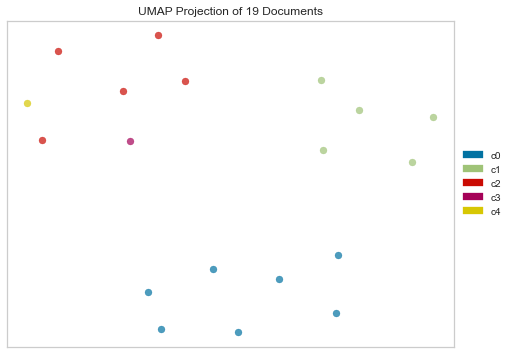

In [26]:
plot_model(lda2, plot = 'umap')

## **Evaluate Model**

In [27]:
evaluate_model(lda2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [28]:
import pickle
with open('Topic_pickle','wb') as f:
  pickle.dump(lda2,f)

In [29]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(lda_results,f)

## **Saving the model**

In [30]:
#save_model(lda2,'Final LDA Model')

## **Loading the model**

In [31]:
#saved_lda = load_model('Final LDA Model')

In [32]:
#print(saved_lda)

## Model Building(classification)

In [50]:
from pycaret.classification import *

clf1 = setup(data = data, 
             target = 'Dominant_Topic',
             numeric_imputation = 'mean',session_id = 250,fold=4,ignore_features = ['Researches','Statistic','Social_medium','Politic','Democracy','Perc_Dominant_Topic'],silent = True)

compare_models()

In [61]:
from pycaret.classification import *
clf = setup(data = data, 
             target = 'Dominant_Topic',
             numeric_imputation = 'mean',fold= 4,fold_shuffle=True,silent = True,session_id=784)



,Description,Value
0,session_id,784
1,Target,Dominant_Topic
2,Target Type,Multiclass
3,Label Encoded,"Democracy: 0, Politic: 1, Researches: 2, Social_medium: 3, Statistic: 4"
4,Original Data,"(19, 8)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [62]:
#Compare the models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0425
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0275
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0275
et,Extra Trees Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1825
catboost,CatBoost Classifier,0.9375,0.0000,0.9375,0.9062,0.9167,0.9167,0.9326,0.5825
gbc,Gradient Boosting Classifier,0.9167,0.0000,0.9167,0.8750,0.8889,0.8750,0.9031,0.2025
rf,Random Forest Classifier,0.7917,0.0000,0.7667,0.7188,0.7431,0.7212,0.7672,0.2600
ada,Ada Boost Classifier,0.7500,0.0000,0.7083,0.6944,0.7083,0.6429,0.6667,0.0875
xgboost,Extreme Gradient Boosting,0.6875,0.0000,0.6458,0.5729,0.6111,0.5595,0.6554,0.2100
dt,Decision Tree Classifier,0.6042,0.0000,0.5833,0.4896,0.5278,0.4792,0.5908,0.0450


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=784, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
#create model
et= create_model('lda') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
SD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [64]:
#tunning
tuned_et= tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
SD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [65]:
pred_model = predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8333,0.9000,0.9000,0.9167,0.8333,0.7931,0.8214


In [66]:
final_model= finalize_model(tuned_et)
final_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.001, solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [67]:
#interpret_model(tuned_et)

## Blending

In [68]:
#top3 = compare_models(n_select = 3)
#blender = blend_models(top3)

In [69]:
dt = create_model('et');      
gbc  = create_model('gbc');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_et,dt,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
SD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


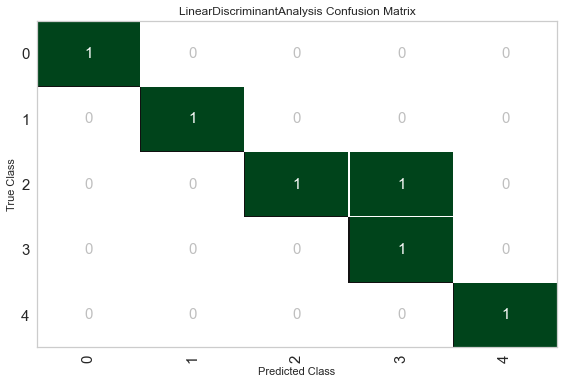

In [70]:
plot_model(estimator = tuned_et, plot = 'confusion_matrix')

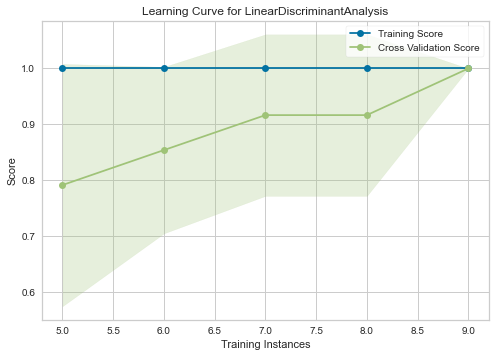

In [71]:
plot_model(estimator = tuned_et, plot = 'learning')


## Evaluate Model

In [72]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
import pickle
with open('lda_pickle1','wb') as f:
  pickle.dump(tuned_et,f)

## Save The Model

In [74]:
#save_model(tuned_et,'Final_Model')

## Load The Model

In [75]:
#saved_lda = load_model('Final_Model')

 ## Deploy Model

In [65]:

import os
os.environ["AZURE_STORAGE_CONNECTION_STRING"] = str("bar")
deploy_model(model = tuned_et, model_name = 'et-deployment', platform = 'azure', authentication = {'container': 'azure-container-name'})

ImportError: azure-storage-blob library not found. pip install azure-storage-blob to use deploy_model function with Azure.